# Evolution of westerly jetstream in ERA5 and simulations 


- meridional maximum of horizontal (u-component) wind speed at 200 hpa can be taken as jet axis 
- contour of 80th percentile in wind speeds should reflected main area occupied 
- TPV occurrence and likelihood to move off highly correlates with jet stream position -> if mechanism is not only via sensible heating but also extratropical-cyclone like, the genesis could be related to perturbances in jet and amplification through baroclinic instabilities 
- see also Hunt et al. (2018)

In [5]:
import xarray as xr
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
#import quiver
import matplotlib.colors as colors
import cartopy.crs as ccrs
import sys
sys.path.insert(1, '../analysis/')
#from cptp import analysis, plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [63]:
# data for vortex inspection
wrf_vorticity = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_VORT.nc').relative_vorticity_filtered
wrf_uwind = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_l_u500hpa.nc').U_PL
wrf_vwind = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_l_v500hpa.nc').V_PL

era_vorticity = xr.open_dataset('/glade/u/home/kukulies/data/ERA5/ERA5_vorticity.nc').relative_vorticity_filtered
era_uwind = xr.open_dataset('/glade/u/home/kukulies/data/ERA5/ERA5_u500hpa.nc').U
era_vwind = xr.open_dataset('/glade/u/home/kukulies/data/ERA5/ERA5_v500hpa.nc').V


In [ ]:
# data for jetstream and large-scale 


# WRF L
wrf_jet = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_MCS_L_u200hpa.nc').U_PL
#wrf_u = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_u500hpa.nc').U_PL
#wrf_v = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_L_v500hpa.nc').V_PL
wrf_geop = xr.open_dataset('/glade/scratch/kukulies/wrf_processed/WRF4km_MCS_L_z500hpa.nc').Z_PL

In [17]:
# ERA
era_u = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_u500hpa_alltimes.nc').U
#era_v = xr.open_dataset('/glade/u/home/kukulies/kukulies032022/data/ERA5/ERA5_v500hpa_alltimes.nc').V
era_jet = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_u200hpa.nc').U
era_geop = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_z500hpa_alltimes.nc').Z / 9.81
era_oro = xr.open_dataset('/glade/scratch/kukulies/kukulies032022/data/ERA5/ERA5_orography.nc').z/ 9.81 

wrf_large = xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/wrfout_d01_2008-07-21_01:00:00')
wrf_lats = wrf_large.XLAT.values[0]
wrf_lons = wrf_large.XLONG.values[0]

In [3]:
# temperature data 
import glob 
wrf4kmL = glob.glob('/glade/scratch/kukulies/wrf_processed/temp/WRF4kmL*500*nc')
wrf4kmL.sort()
era= Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807')


## Vortex evolution during initiatilization

In [158]:
minlon, maxlon = 80, 100
minlat, maxlat = 28,38

time1= datetime(2008,7,18,16)
time2= datetime(2008,7,19,6)
time3= datetime(2008,7,19,16)
time4= datetime(2008,7,20,6)

era1= era_vorticity.sel(time = time1).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era2= era_vorticity.sel(time = time2).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era3= era_vorticity.sel(time = time3).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era4= era_vorticity.sel(time = time4).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)

era1= era_vorticity.sel(time = time1).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era2= era_vorticity.sel(time = time2).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era3= era_vorticity.sel(time = time3).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)
era4= era_vorticity.sel(time = time4).where( (era_vorticity.longitude > minlon) & (era_vorticity.longitude < maxlon) & (era_vorticity.latitude > minlat) & (era_vorticity.latitude < maxlat), drop = True)

era_u1= era_vorticity.sel(time = time1).where( (era_uwind.longitude > minlon) & (era_uwind.longitude < maxlon) & (era_uwind.latitude > minlat) & (era_uwind.latitude < maxlat), drop = True)
era_u2= era_vorticity.sel(time = time2).where( (era_uwind.longitude > minlon) & (era_uwind.longitude < maxlon) & (era_uwind.latitude > minlat) & (era_uwind.latitude < maxlat), drop = True)
era_u3= era_vorticity.sel(time = time3).where( (era_uwind.longitude > minlon) & (era_uwind.longitude < maxlon) & (era_uwind.latitude > minlat) & (era_uwind.latitude < maxlat), drop = True)
era_u4= era_vorticity.sel(time = time4).where( (era_uwind.longitude > minlon) & (era_uwind.longitude < maxlon) & (era_uwind.latitude > minlat) & (era_uwind.latitude < maxlat), drop = True)

era_v1= era_vorticity.sel(time = time1).where( (era_vwind.longitude > minlon) & (era_vwind.longitude < maxlon) & (era_vwind.latitude > minlat) & (era_vwind.latitude < maxlat), drop = True)
era_v2= era_vorticity.sel(time = time2).where( (era_vwind.longitude > minlon) & (era_vwind.longitude < maxlon) & (era_vwind.latitude > minlat) & (era_vwind.latitude < maxlat), drop = True)
era_v3= era_vorticity.sel(time = time3).where( (era_vwind.longitude > minlon) & (era_vwind.longitude < maxlon) & (era_vwind.latitude > minlat) & (era_vwind.latitude < maxlat), drop = True)
era_v4= era_vorticity.sel(time = time4).where( (era_vwind.longitude > minlon) & (era_vwind.longitude < maxlon) & (era_vwind.latitude > minlat) & (era_vwind.latitude < maxlat), drop = True)


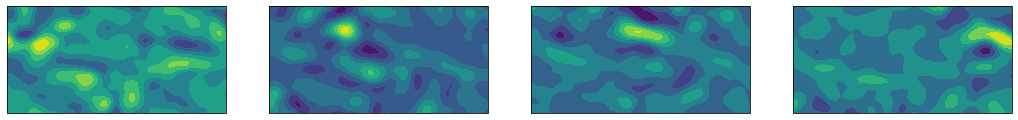

In [159]:
plt.figure(figsize=(18,8))

x,y = np.meshgrid(era1.longitude.values, era1.latitude.values)
skip  =(slice(None,None,2),slice(None,None,2))

ax = plt.subplot(1,4,1, projection=ccrs.PlateCarree())
ax.contourf(x, y, era1)

ax = plt.subplot(1,4,2, projection=ccrs.PlateCarree())
ax.contourf(x, y, era2)

ax = plt.subplot(1,4,3, projection=ccrs.PlateCarree())
ax.contourf(x, y, era3)

ax = plt.subplot(1,4,4, projection=ccrs.PlateCarree())
m=ax.contourf(x, y, era4)


plt.show()


## Jet stream position before and during vortex initiation 

In [132]:
era_jet_max = era_jet.argmax('latitude')
percentile80 = np.percentile(era_jet, 80)

/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


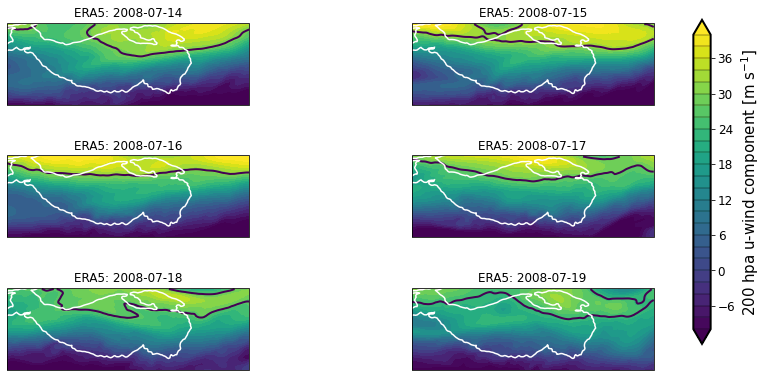

In [138]:
fig =plt.figure(figsize=(12,6))

sp = 1
fs = 12

for day in np.arange(14, 20):
    era_jet_mean = era_jet.where(era_jet.time.dt.day == day).mean('time')
    percentile80 = np.percentile(era_jet_mean, 80)
    # make subplot
    ax = plt.subplot(3,2, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_jet_mean.longitude, era_jet_mean.latitude, era_jet_mean, levels = np.arange(-10, 42, 2), extend = 'both')
    ax.contour(era_jet_mean.longitude, era_jet_mean.latitude, era_jet_mean, levels = [percentile80], linewidths= 2.0)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    sp+=1 

cb_ax2 = fig.add_axes([0.92, 0.14,0.02, 0.75])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'200 hpa u-wind component [m s$^{-1}$]', size=15)


plt.tight_layout()
plt.savefig('plots/jetposition_era5.png')
plt.show()

In [7]:
# ERA5 TPV track for plotting 
from scipy import interpolate
import pandas as pd 
track_era5 = pd.read_table('/glade/u/home/kukulies/data/ERA5/ERA5_TPV_track_2008-07-18:21.txt', sep = '\s',names = ['time', 'lon', 'lat', 'geopotential'])
# interpolate time steps from 6-hourly to hourly 
f = interpolate.interp1d(track_era5.lon.values, track_era5.lat.values)
lonnew = np.linspace(track_era5.lon.values.min(), track_era5.lon.values.max(), 73)
latnew = f(lonnew)  
coords= {'case':[lonnew,latnew]}
lon_t= lonnew
lat_t=latnew


/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


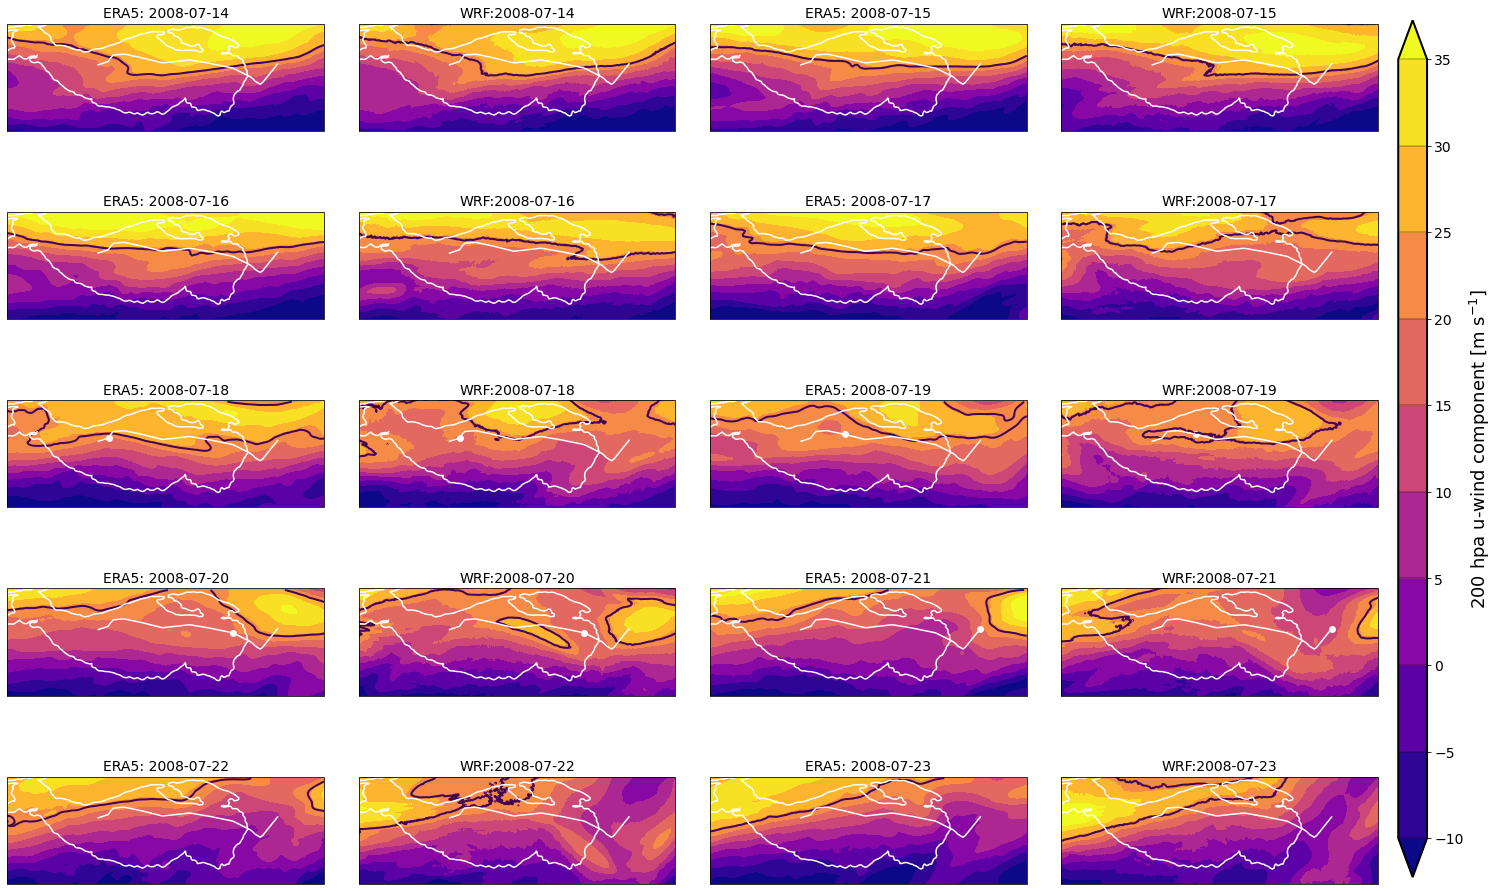

In [235]:
fig =plt.figure(figsize=(20,14))

fs = 14
sp = 1
cmap = 'plasma'
levels = np.arange(-10,40,5)

for day in np.arange(14,24):
    #### ERA5 ####
    era_jet_mean = era_jet.where(era_jet.time.dt.day == day).mean('time')
    #percentile80 = np.percentile(era_jet_mean, 80)
    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_jet_mean.longitude, era_jet_mean.latitude, era_jet_mean, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_jet_mean.longitude, era_jet_mean.latitude, era_jet_mean, levels = [percentile80], linewidths= 2.0)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 35)
    
    #### WRF #####
    start = '2008-07-'+str(day)+'_00:00:00'
    if day == 15:
        start = '2008-07-'+str(day)+'_01:00:00'
    end = '2008-07-'+str(day)+'_23:00:00'
    wrf_jet_mean = wrf_jet.sel(time = slice(start,end)).mean('time')
    #percentile80 = np.percentile(wrf_jet_mean, 80)
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_jet_mean, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(wrf_lons, wrf_lats, wrf_jet_mean, levels = [percentile80], linewidths= 2.0)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s= 35)
    
    sp+=2

cb_ax2 = fig.add_axes([0.99, 0.08,0.02, 0.85])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'200 hpa u-wind component [m s$^{-1}$]', size=18)

plt.tight_layout()

plt.savefig('plots/jetposition_wrf_era_track.png', bbox_inches = 'tight', facecolor= 'white', transparent = None)
plt.show()

/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


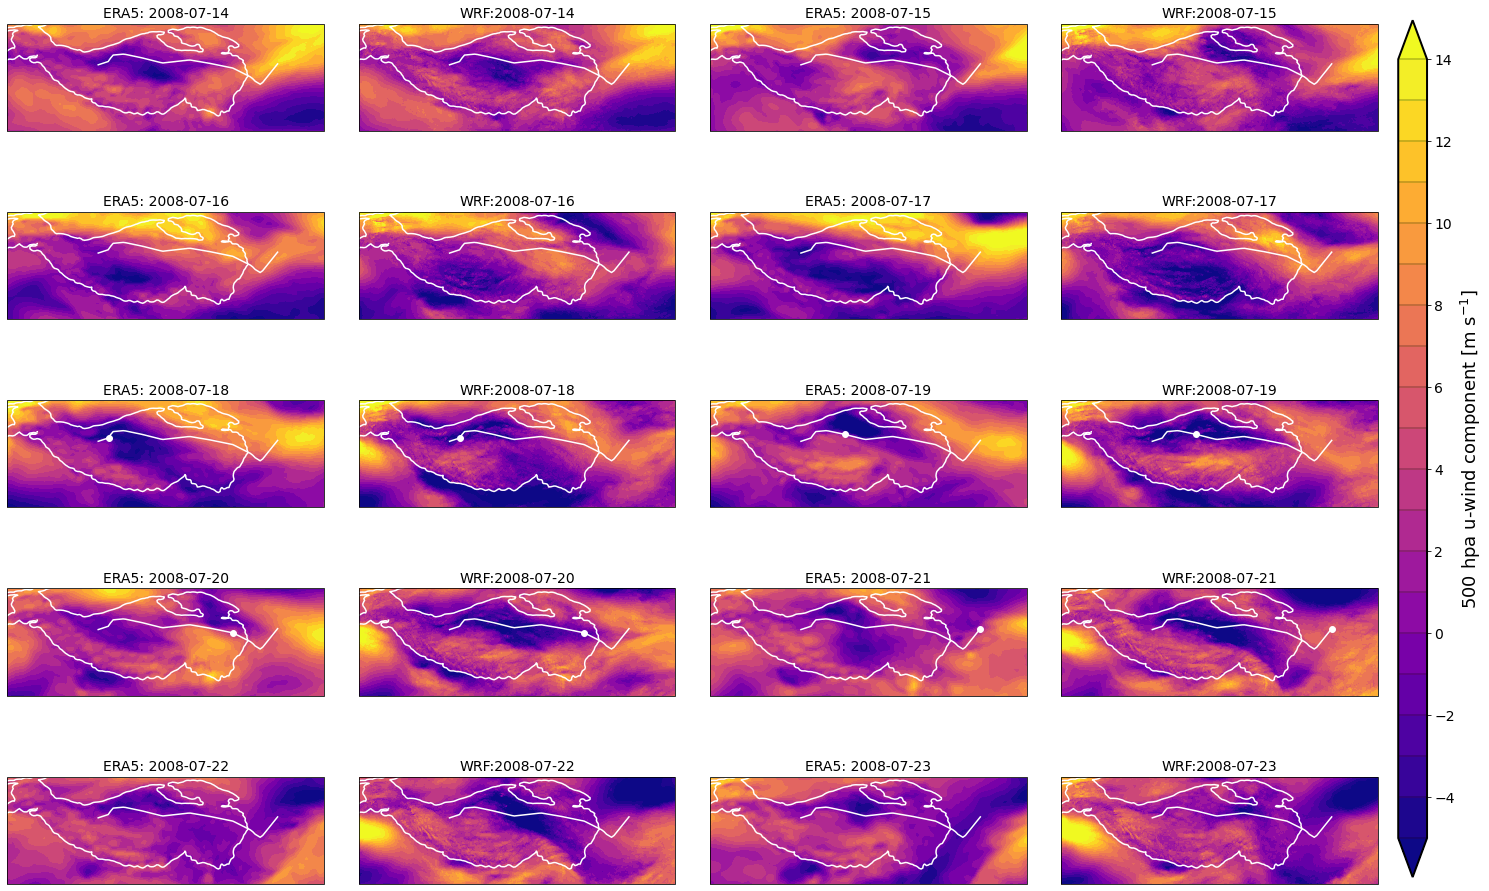

In [244]:
fig =plt.figure(figsize=(20,14))

fs = 14
sp = 1
cmap = 'plasma'
levels = np.arange(-5,15,1)

for day in np.arange(14,24):
    #### ERA5 ####
    era_jet_mean = era_jet.where(era_jet.time.dt.day == day).mean('time')
    #percentile80 = np.percentile(era_jet_mean, 80)
    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_jet_mean.longitude, era_jet_mean.latitude, era_jet_mean, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 35)
    
    #### WRF #####
    start = '2008-07-'+str(day)+'_00:00:00'
    if day == 15:
        start = '2008-07-'+str(day)+'_01:00:00'
    end = '2008-07-'+str(day)+'_23:00:00'
    wrf_jet_mean = wrf_jet.sel(time = slice(start,end)).mean('time')
    #percentile80 = np.percentile(wrf_jet_mean, 80)
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_jet_mean, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s= 35)
    
    sp+=2

cb_ax2 = fig.add_axes([0.99, 0.08,0.02, 0.85])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'500 hpa u-wind component [m s$^{-1}$]', size=18)

plt.tight_layout()

plt.savefig('plots/uwind500_wrf_era_track.png', bbox_inches = 'tight', facecolor= 'white', transparent = None)
plt.show()

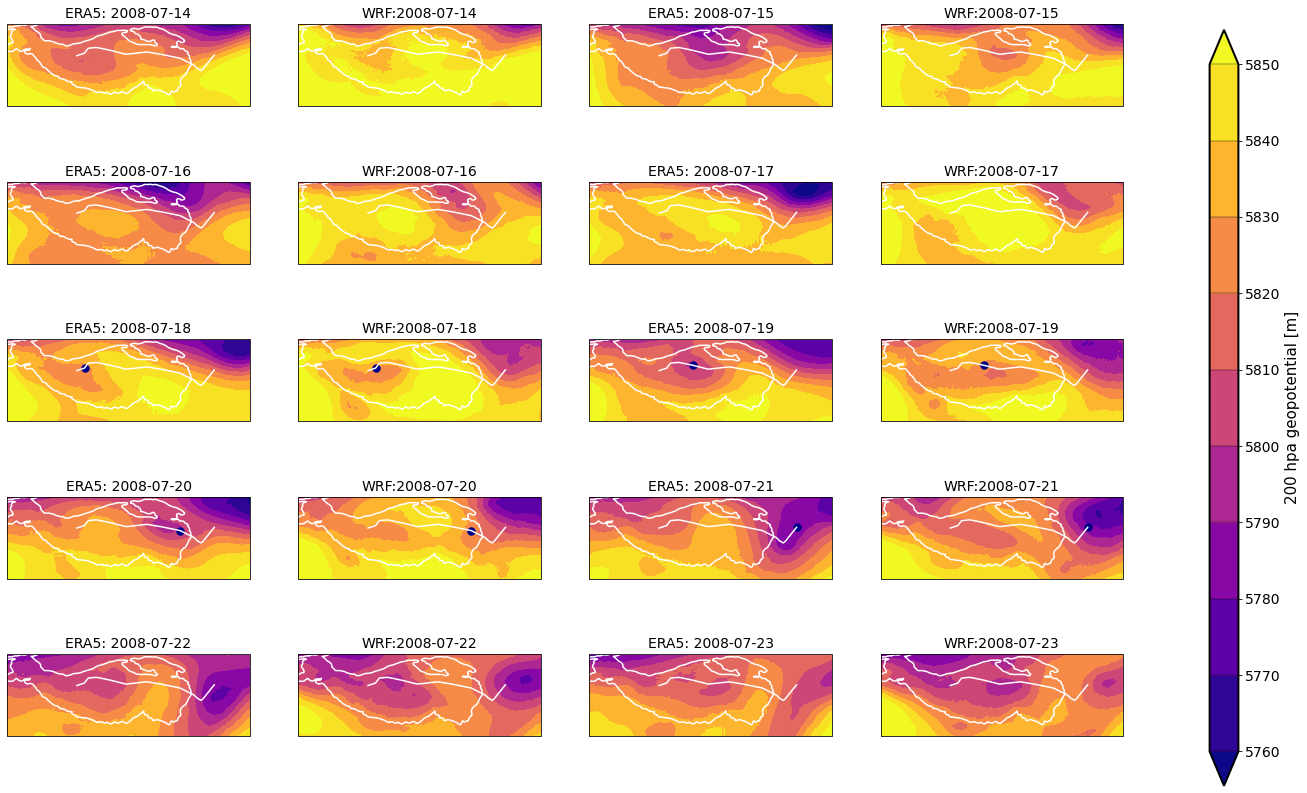

In [42]:
fig =plt.figure(figsize=(20,14))

fs = 14
sp = 1
cmap = 'plasma'
levels = np.arange(12400,12580,20)
levels = np.arange(5760,5860,10)


for day in np.arange(14,24):
    #### ERA5 ####
    era_geop_mean = era_geop.where(era_geop.time.dt.day == day).mean('time')
    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_geop_mean.longitude, era_geop_mean.latitude, era_geop_mean, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'darkblue', s = 55)
    
    #### WRF #####
    start = '2008-07-'+str(day)+'_00:00:00'
    if day == 15:
        start = '2008-07-'+str(day)+'_01:00:00'
    end = '2008-07-'+str(day)+'_23:00:00'
    wrf_geop_mean = wrf_geop.sel(time = slice(start,end)).mean('time')
    #percentile80 = np.percentile(wrf_jet_mean, 80)
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_geop_mean, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'darkblue', s = 55)
    
    sp+=2

cb_ax2 = fig.add_axes([0.96, 0.1,0.02, 0.75])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'200 hpa geopotential [m]', size=15)


plt.savefig('plots/geop500_wrf_era.png')
plt.show()

# Divergence of wind field 

In [5]:
# for calculatation of  divergence 
import metpy
import metpy.calc as mcalc
from metpy.units import units

/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


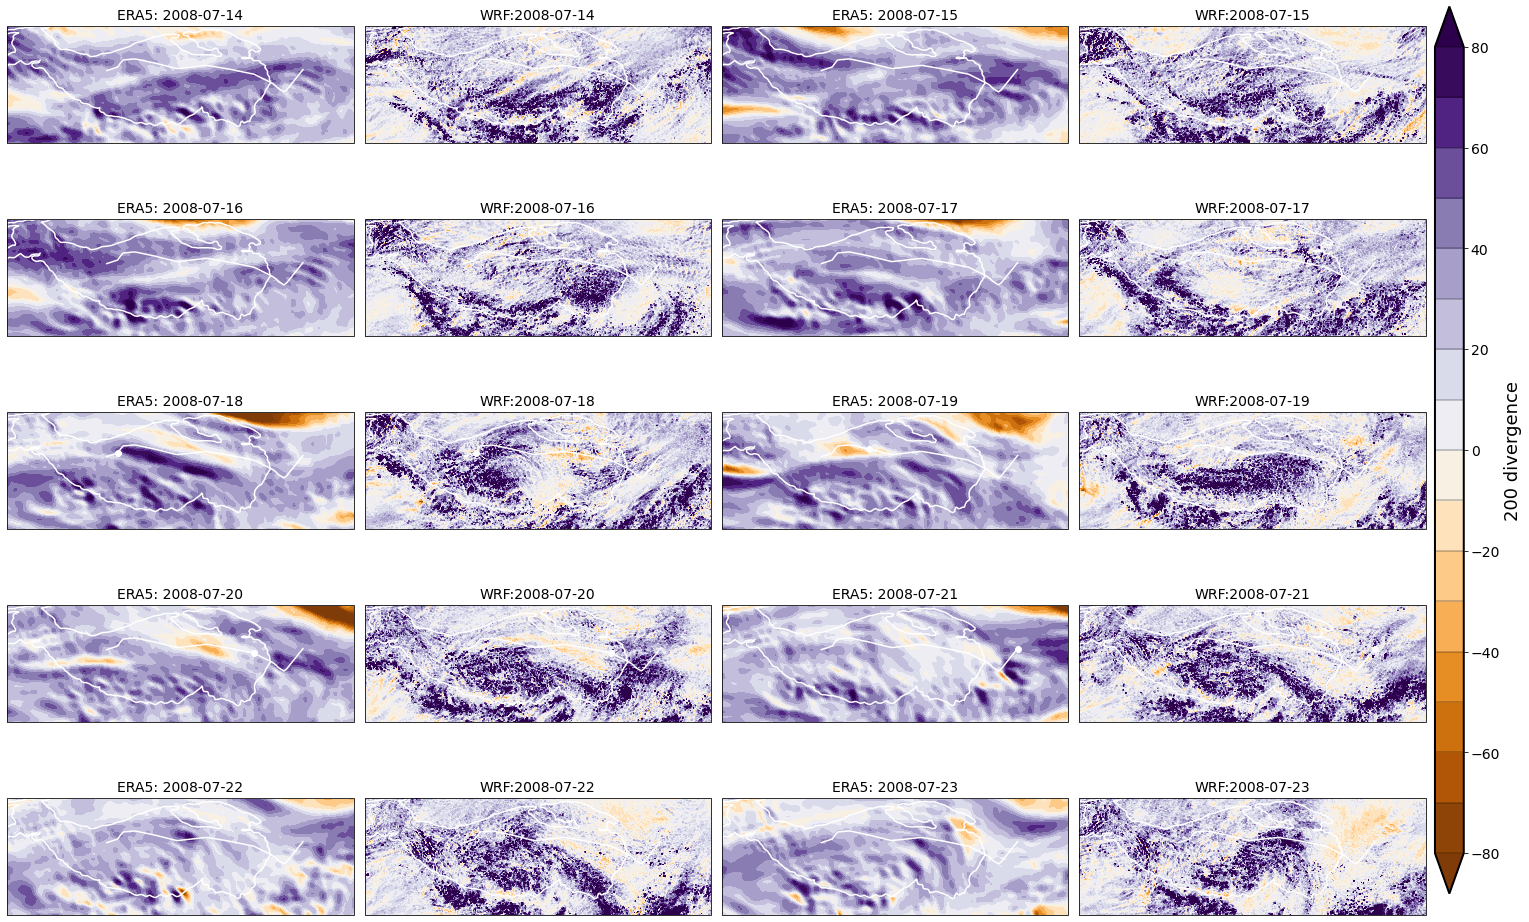

In [11]:
fig =plt.figure(figsize=(20,14))
fs = 14
sp = 1
cmap = 'PuOr'
levels = np.arange(-80,90,10) 

for day in np.arange(14,24):
    #### ERA5 ####
    era_u_mean = era_u.where(era_u.time.dt.day == day).mean('time')
    era_v_mean = era_u.where(era_v.time.dt.day == day).mean('time')
    dx_era, dy_era = mcalc.lat_lon_grid_deltas(era_u.longitude.values, era_u.latitude.values)
    era_div = mcalc.divergence(era_u_mean.values * units.meter/ units.second, era_v_mean.values* units.meter/ units.second, dx_era, dy_era)

    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_u.longitude, era_u.latitude, era_div/1e-6, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 35)
    
    #### WRF #####
    start = '2008-07-'+str(day)+'_00:00:00'
    if day == 15:
        start = '2008-07-'+str(day)+'_01:00:00'
    end = '2008-07-'+str(day)+'_23:00:00'
    wrf_u_mean = wrf_u.sel(time = slice(start,end)).mean('time')
    wrf_v_mean = wrf_v.sel(time = slice(start,end)).mean('time')
    wrf_div = mcalc.divergence(wrf_u_mean.values* units.meter/ units.second, wrf_v_mean.values * units.meter/ units.second, dx = 4000* units.meter, dy = 4000 * units.meter)

    #percentile80 = np.percentile(wrf_jet_mean, 80)
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_div/1e-6, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s= 35)
    
    sp+=2

cb_ax2 = fig.add_axes([0.999, 0.08,0.02, 0.88])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'200 divergence [10$^{-6}$s$^{-1}$]', size=18)

plt.tight_layout()

plt.savefig('plots/divergence200_wrf_era.png', bbox_inches = 'tight', facecolor= 'white', transparent = None)
plt.show()

/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


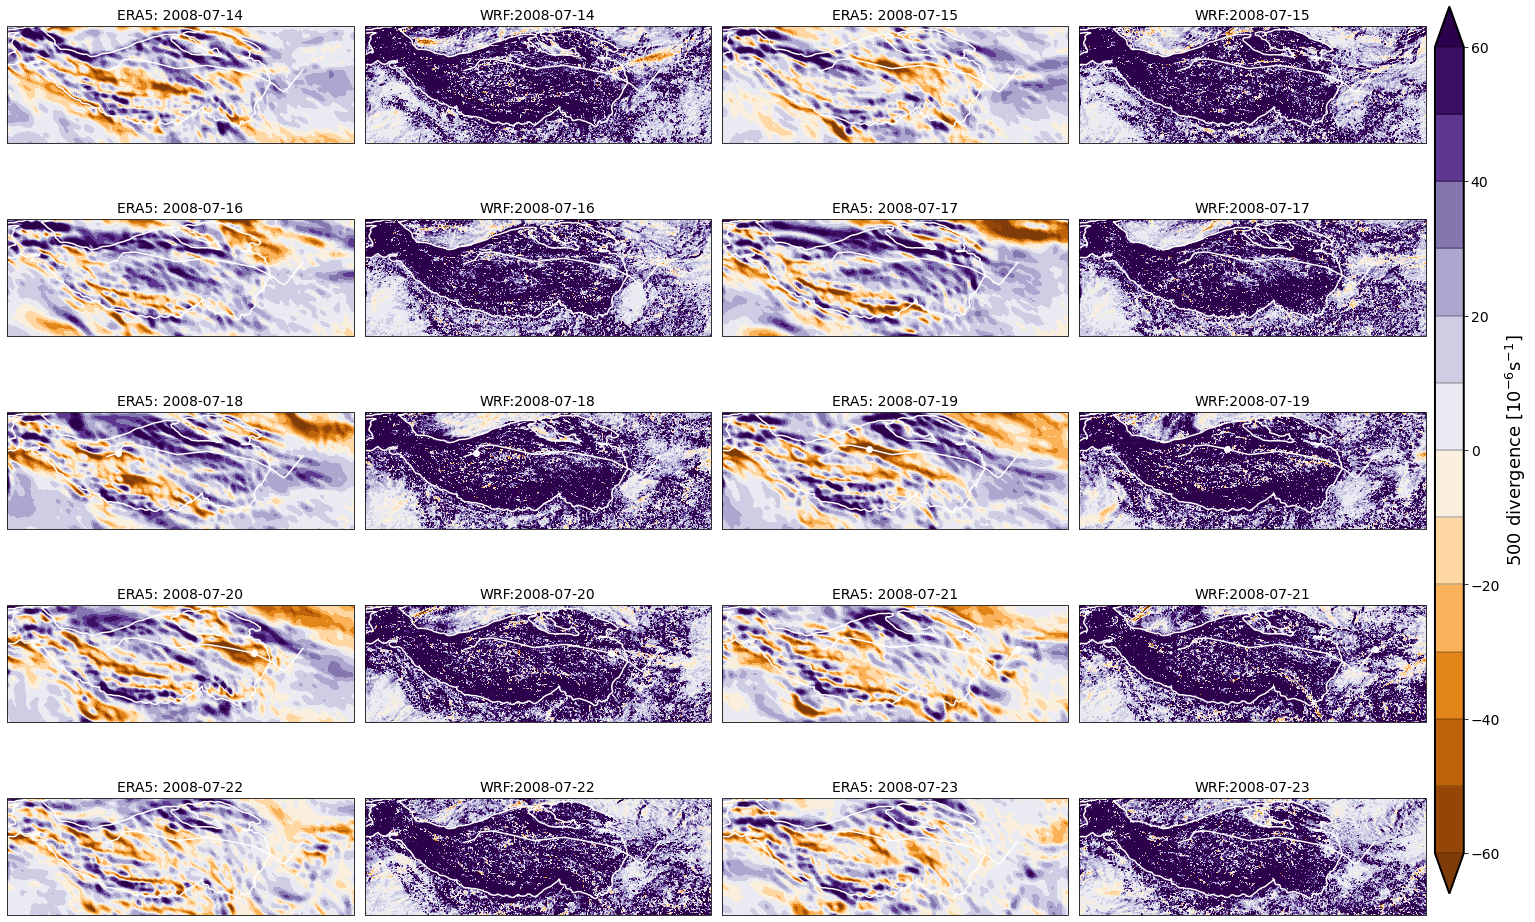

In [10]:
fig =plt.figure(figsize=(20,14))
fs = 14
sp = 1
cmap = 'PuOr'
levels = np.arange(-60,70,10) 

for day in np.arange(14,24):
    #### ERA5 ####
    era_u_mean = era_u.where(era_u.time.dt.day == day).mean('time')
    era_v_mean = era_u.where(era_v.time.dt.day == day).mean('time')
    dx_era, dy_era = mcalc.lat_lon_grid_deltas(era_u.longitude.values, era_u.latitude.values)
    era_div = mcalc.divergence(era_u_mean.values * units.meter/ units.second, era_v_mean.values* units.meter/ units.second, dx_era, dy_era)

    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    m= ax.contourf(era_u.longitude, era_u.latitude, era_div/1e-6, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 35)
    
    #### WRF #####
    start = '2008-07-'+str(day)+'_00:00:00'
    if day == 15:
        start = '2008-07-'+str(day)+'_01:00:00'
    end = '2008-07-'+str(day)+'_23:00:00'
    wrf_u_mean = wrf_u.sel(time = slice(start,end)).mean('time')
    wrf_v_mean = wrf_v.sel(time = slice(start,end)).mean('time')
    wrf_div = mcalc.divergence(wrf_u_mean.values* units.meter/ units.second, wrf_v_mean.values * units.meter/ units.second, dx = 4000* units.meter, dy = 4000 * units.meter)

    #percentile80 = np.percentile(wrf_jet_mean, 80)
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_div/1e-6, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s= 35)
    
    sp+=2

cb_ax2 = fig.add_axes([0.999, 0.08,0.02, 0.88])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'500 divergence [10$^{-6}$s$^{-1}$]', size=18)

plt.tight_layout()

plt.savefig('plots/divergence500_wrf_era.png', bbox_inches = 'tight', facecolor= 'white', transparent = None)
plt.show()

## Horizontal temperature gradient 

/glade/work/kukulies/npl_clone/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


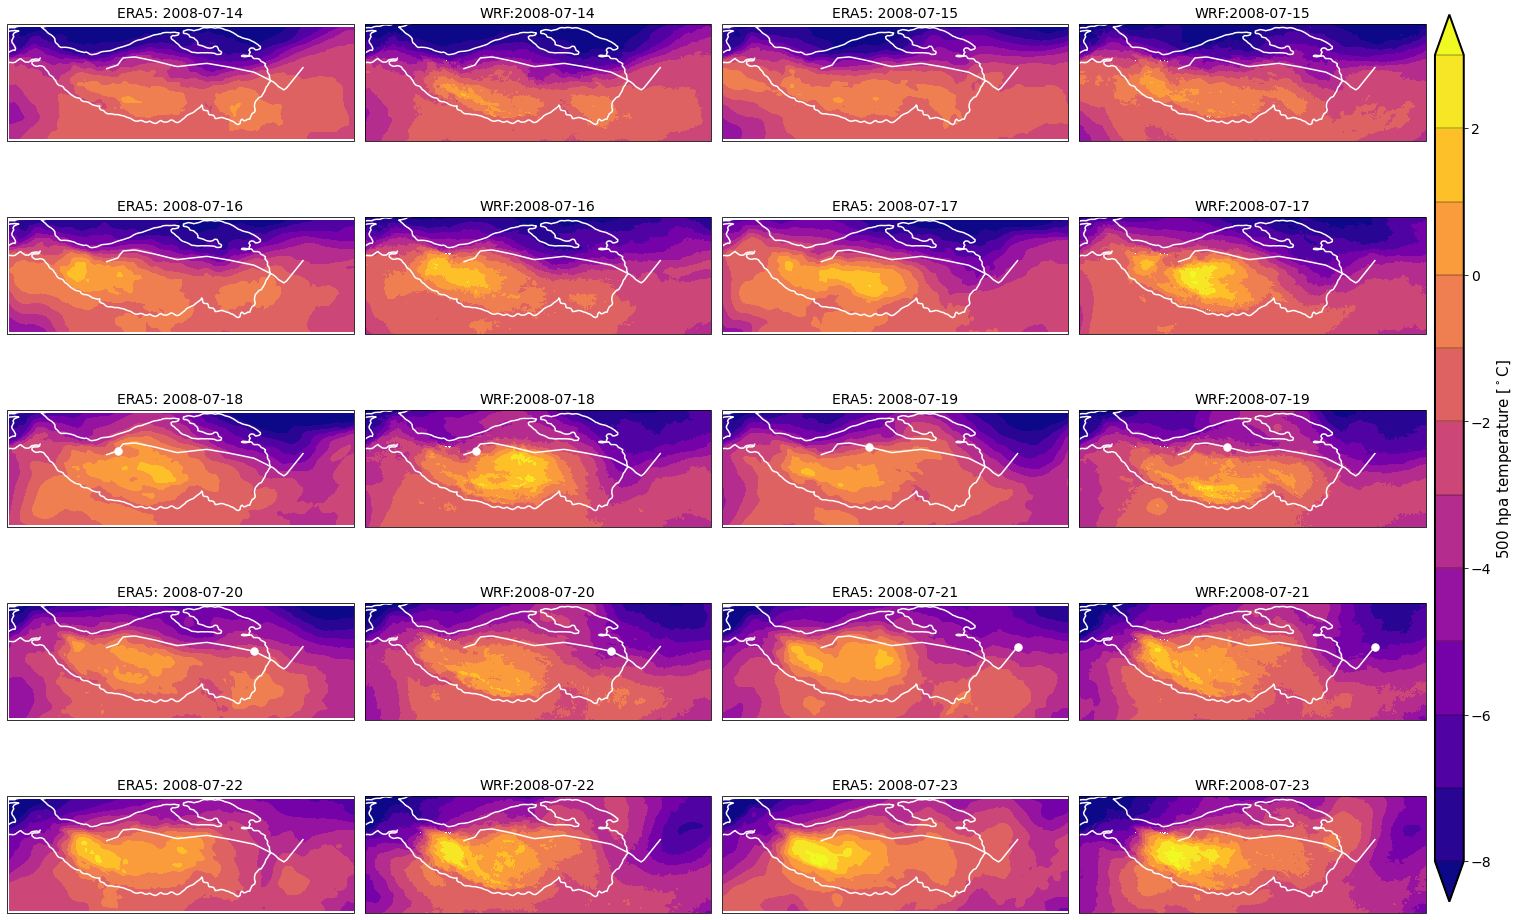

In [8]:
fig =plt.figure(figsize=(20,14))

fs = 14
sp = 1
cmap = 'plasma'
levels = np.arange(-8,4,1)
idx = 0 

for day in np.arange(14,24):
    #### ERA5 ####
    temp= xr.open_dataset(era/ ('e5.oper.an.pl.128_130_t.ll025sc.200807'+str(day)+'00_200807'+str(day)+'23.nc'))
    minlat,maxlat = 25, 40
    minlon,maxlon = 70,120
    temp_tp= temp.where((temp.latitude> minlat) & (temp.latitude <maxlat)& (temp.longitude > minlon) & (temp.longitude <maxlon), drop = True).T.sel(level = 500).mean('time')
    # make subplot
    ax = plt.subplot(5,4, sp, projection=ccrs.PlateCarree())
    ax.set_extent([70,115, 25, 38])
    ax.set_title('ERA5: 2008-07-' + str(day), fontsize= fs)
    
    m= ax.contourf(temp_tp.longitude, temp_tp.latitude, temp_tp.values- 273.15, levels = levels, extend = 'both', cmap = cmap)
    ax.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 55)
    
    #### WRF #####
    wrf_temp= xr.open_dataarray(wrf4kmL[idx]).mean('dim_0')
    idx +=1 
    # make subplot
    ax2 = plt.subplot(5,4, sp+1, projection=ccrs.PlateCarree())
    ax2.set_extent([70,115, 25, 38])
    ax2.set_title('WRF:2008-07-' + str(day), fontsize= fs)
    m= ax2.contourf(wrf_lons, wrf_lats, wrf_temp, levels = levels, extend = 'both', cmap = cmap)
    ax2.contour(era_oro.longitude, era_oro.latitude, era_oro.values[0], levels = [3000], cmap = 'Greys')
    ax2.plot(lon_t, lat_t, color = 'white', linewidth = 1.5)
    if day > 17 and day < 22:
        ax2.scatter(track_era5[track_era5.time == int('200807'+str(day)+'12')].lon.values[0], track_era5[track_era5.time == int('200807'+str(day)+'12')].lat.values[0],marker = 'o',c = 'white', s = 55)
    
    sp+=2

cb_ax2 = fig.add_axes([0.999, 0.07,0.02, 0.88])
cbar = fig.colorbar(m, cax=cb_ax2,   drawedges=True)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(2)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'500 hpa temperature [$^\circ$C]', size=15)

plt.tight_layout()
plt.savefig('plots/temp500_wrf_era.png')
plt.show()

## ERA5 jetstream position

How far north does the jetstream reach? Does our model boundary cut through the jet and thereby affect it? 

In [136]:
era = Path('/gpfs/fs1/collections/rda/data/ds633.0/e5.oper.an.pl/200807/')
u200_cropped = np.zeros((319, 679))
days = np.arange(18,22)
for day in days:
    day = str(day).zfill(2)
    u200 = xr.open_dataset(era / ('e5.oper.an.pl.128_131_u.ll025uv.200807'+day+'00_200807' +day+ '23.nc')).U.sel(level  = 200).mean('time')
    minlat, maxlat = 0, 80
    minlon, maxlon = 0, 170
    u200_cropped += u200.where((u200.latitude > minlat) & (u200.latitude < maxlat) & (u200.longitude > minlon) & (u200.longitude < maxlon), drop = True).values
    
u200 = u200.where((u200.latitude > minlat) & (u200.latitude < maxlat) & (u200.longitude > minlon) & (u200.longitude < maxlon), drop = True)

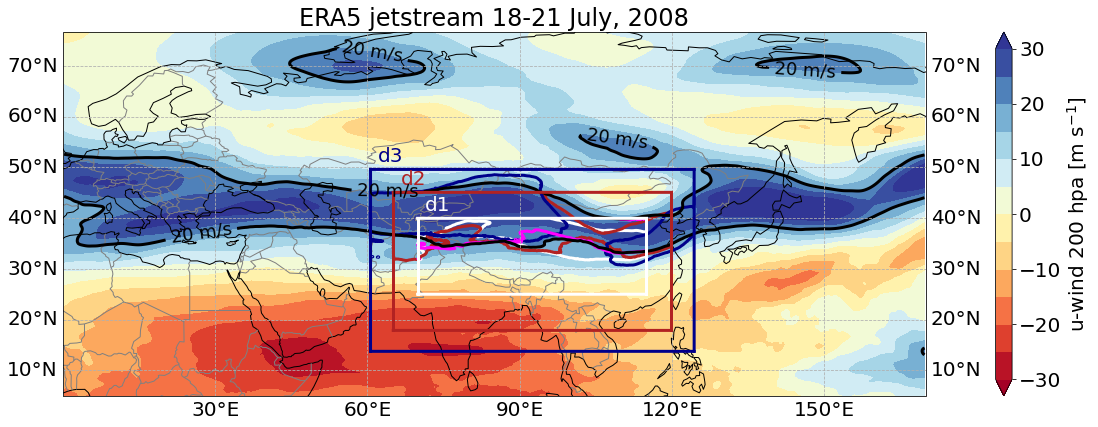

In [145]:
# plot 
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

lw = 3.0
plt.figure(figsize=(20,6))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minlon, maxlon, minlat+5, maxlat-60])
ax.set_title('ERA5 jetstream 18-21 July, 2008', fontsize= 24)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, color = 'gray')
cmap = 'RdYlBu'

u200_mean =  u200_cropped/ days.size
m= ax.contourf(u200.longitude, u200.latitude, u200_mean ,levels = np.arange(-30,35,5), extend = 'both', cmap = cmap)
plt.colorbar(m, label= 'u-wind 200 hpa [m s$^{-1}$]')
# plot domains on top 

#ax.add_patch(mpatches.Rectangle(xy=[70, 25], width=45, height=15,facecolor='none',edgecolor = 'k',lw = lw,transform=ccrs.PlateCarree()) )

# wind speed to look at 
ws = 20

# small domain 
color = 'white'
ax.text(wrf_lons_small1[0] + 1.5, wrf_lats_small2[0] + 1.5, s= 'd1', color = color )
ax.plot(wrf_lons_small1, wrf_lats_small1, lw = lw , color = color)
ax.plot(wrf_lons_small2, wrf_lats_small2, lw = lw , color = color)
ax.plot(wrf_lons_small3, wrf_lats_small3, lw = lw , color = color)
ax.plot(wrf_lons_small4, wrf_lats_small4, lw = lw , color = color)
ax.contour(wrf1.XLONG.squeeze(), wrf1.XLAT.squeeze(), wrf4km_u200,levels = [ws],colors = [color] ,linewidths =[lw] )

# large domain 
color  = 'firebrick'
ax.text(wrf_lons_large1[0] + 1.5, wrf_lats_large2[0] + 1.5, s= 'd2', color = color)
ax.plot(wrf_lons_large1, wrf_lats_large1, lw = lw , color = color)
ax.plot(wrf_lons_large2, wrf_lats_large2, lw = lw , color = color)
ax.plot(wrf_lons_large3, wrf_lats_large3, lw = lw , color = color)
ax.plot(wrf_lons_large4, wrf_lats_large4, lw = lw , color = color)
ax.contour(wrf2.XLONG[0], wrf2.XLAT[0], wrf4kmL_u200,levels = [ws], colors = [color],linewidths =[lw] )


# large-large domain 
color = 'darkblue'
ax.text(wrf_lons_5deg1[0] + 1.5, wrf_lats_5deg2[0] + 1.5, s= 'd3', color = color )
ax.plot(wrf_lons_5deg1, wrf_lats_5deg1, lw = lw , color =color)
ax.plot(wrf_lons_5deg2, wrf_lats_5deg2, lw = lw , color = color)
ax.plot(wrf_lons_5deg3, wrf_lats_5deg3, lw = lw , color = color)
ax.plot(wrf_lons_5deg4, wrf_lats_5deg4, lw = lw , color = color)
ax.contour(wrf3.XLONG_M[0], wrf3.XLAT_M[0], wrf4km_5deg_u200,levels = [ws], colors = [color],linewidths =[lw] )
 
    
color = 'magenta'
ax.contour(wrf1.XLONG.squeeze(), wrf1.XLAT.squeeze(), wrf4km_spectral_u200[0], levels = [ws],colors = [color] ,linewidths =[lw] )


# plot jet stream contour 
percentile80 = np.percentile(u200_mean, 80)
CS=ax.contour(u200.longitude, u200.latitude, u200_mean ,levels =[ws], cmap = 'Greys_r', linewidths= 3.0)

gl= ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle= '--')
gl.top_labels = False

def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} m/s"

ax.clabel(CS, CS.levels, inline=True, fmt= fmt, fontsize=18)

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig('plots/jetstream_domains_positions_18-21.png', bbox_inches = 'tight', facecolor = 'white', transparent = False)
plt.show()

In [2]:
from netCDF4 import Dataset
import wrf 
f = Path('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/wrfout_d01_2008-07-21_01:00:00')
pressure = wrf.getvar(Dataset(f), 'pressure')

## Get domain extends

In [3]:
wrf1= xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS/wrfout/wrfout_d01_2008-07-21_01:00:00')
wrf_lats_small1 = wrf1.XLAT.values[0][:,0]
wrf_lons_small1 = wrf1.XLONG.values[0][:,0]

wrf_lats_small2 = wrf1.XLAT.values[0][-1,:]
wrf_lons_small2 = wrf1.XLONG.values[0][-1,:]

wrf_lats_small3 = wrf1.XLAT.values[0][0,:]
wrf_lons_small3 = wrf1.XLONG.values[0][0,:]

wrf_lats_small4 = wrf1.XLAT.values[0][:,-1]
wrf_lons_small4 = wrf1.XLONG.values[0][:,-1]

In [4]:
wrf2 = xr.open_dataset('/glade/campaign/mmm/c3we/prein/CPTP/data/4km_MCS_L/wrfout/wrfoutPL_d01.2008-07-16_01:00:00.nc')

wrf_lats_large1 = wrf2.XLAT.values[0][:,0]
wrf_lons_large1 = wrf2.XLONG.values[0][:,0]

wrf_lats_large2 = wrf2.XLAT.values[0][-1,:]
wrf_lons_large2 = wrf2.XLONG.values[0][-1,:]

wrf_lats_large3 = wrf2.XLAT.values[0][0,:]
wrf_lons_large3 = wrf2.XLONG.values[0][0,:]

wrf_lats_large4 = wrf2.XLAT.values[0][:,-1]
wrf_lons_large4 = wrf2.XLONG.values[0][:,-1]

In [5]:
wrf3 = xr.open_dataset('/glade/u/home/kukulies/WRF_simulations/4km_5deg/geo_em.d01.nc')
wrf_lats_5deg1 = wrf3.XLAT_M.values[0][:,0]
wrf_lons_5deg1 = wrf3.XLONG_M.values[0][:,0]

wrf_lats_5deg2 = wrf3.XLAT_M.values[0][-1,:]
wrf_lons_5deg2 = wrf3.XLONG_M.values[0][-1,:]

wrf_lats_5deg3 = wrf3.XLAT_M.values[0][0,:]
wrf_lons_5deg3 = wrf3.XLONG_M.values[0][0,:]

wrf_lats_5deg4 = wrf3.XLAT_M.values[0][:,-1]
wrf_lons_5deg4 = wrf3.XLONG_M.values[0][:,-1]

## Get the uwind component at 200 hpa for all three domains 

In [140]:
path = Path('/glade/scratch/kukulies/wrf_processed/')
wrf4kmL_u200 = xr.open_dataset(path / 'WRF4km_l_u200hpa_alltimes.nc')
wrf4km_u200 = xr.open_dataset(path / 'wrf4km_u200hpa.nc')
wrf4km_5deg_u200 = xr.open_dataset(path / 'WRF4km_5deg_u200hpa.nc')
wrf4km_spectral_u200 = xr.open_dataset(path / 'WRF4km_spectral_u200hpa.nc')

In [131]:
path = Path('/glade/scratch/kukulies/wrf_processed/')
wrf4kmL_u200 = xr.open_dataset(path / 'WRF4km_l_u200hpa_alltimes.nc').U_PL.mean('time')
wrf4km_u200 = xr.open_dataset(path / 'wrf4km_u200hpa.nc').U_PL.mean('time')
wrf4km_5deg_u200 = xr.open_dataset(path / 'WRF4km_5deg_u200hpa.nc').U_PL.mean('time')
wrf4km_spectral_u200 = xr.open_dataset(path / 'WRF4km_spectral_u200hpa.nc').U_PL.mean('Time')

In [141]:
# select time for nudged 
wrf4km_spectral_u200 = wrf4km_spectral_u200.U_PL[96:192].mean('Time')

In [142]:
# compute mean over selected times 
start = '2008-07-18_00:00:00'
end = '2008-07-21_23:00:00'

times = np.array(wrf4kmL_u200.time.values).flatten().astype(str)                                                                                                                 
wrf4kmL_u200 = analysis.select_time(wrf4kmL_u200,start, end, 'time', times).U_PL.mean('time')
times = np.array(wrf4km_u200.time.values).flatten().astype(str)   
wrf4km_u200 = analysis.select_time(wrf4km_u200,start, end, 'time', times).U_PL.mean('time')
times = np.array(wrf4km_5deg_u200.time.values).flatten().astype(str)   
wrf4km_5deg_u200 = analysis.select_time(wrf4km_5deg_u200,start, end, 'time', times).U_PL.mean('time')


## Calculate e_we and s_sn based on distance between desired lats and lons 

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [42]:
# south-north extension 
lon1, lon2 = 92, 92
lat1, lat2= 12, 17
lat3, lat4= 45, 50
distance1 = haversine(lon1, lat1, lon2, lat2)
distance2 = haversine(lon1, lat1, lon2, lat2)
print((int(distance1) + int(distance2))/ 4)

277.5


In [45]:
# west_east extension 
lon1, lon2 = 60,65
lon3, lon4 = 120,125
lat1, lat2= 12, 12
lat3, lat4= 50, 50
distance1 = haversine(lon1, lat1, lon2, lat2)
distance2 = haversine(lon3, lat3, lon4, lat4)
print((int(distance1) + int(distance2))/ 4)

225.0


Add to previous grid cell numbers 

In [49]:
1383 + 225

1608

In [48]:
819 + 277

1096